In [105]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes as axes;
from matplotlib.patches import Ellipse
matplotlib_style = 'fivethirtyeight' #@param ['fivethirtyeight', 'bmh', 'ggplot', 'seaborn', 'default', 'Solarize_Light2', 'classic', 'dark_background', 'seaborn-colorblind', 'seaborn-notebook']
plt.style.use(matplotlib_style)
import seaborn as sns; sns.set_context('notebook')
from IPython.core.pylabtools import figsize
tf.enable_eager_execution()

In [106]:
def evaluate(tensors):
    """Evaluates Tensor or EagerTensor to Numpy `ndarray`s.
    Args:
    tensors: Object of `Tensor` or EagerTensor`s; can be `list`, `tuple`,
      `namedtuple` or combinations thereof.
 
    Returns:
      ndarrays: Object with same structure as `tensors` except with `Tensor` or
        `EagerTensor`s replaced by Numpy `ndarray`s.
    """
    if tf.executing_eagerly():
        return tf.contrib.framework.nest.pack_sequence_as(
            tensors,
            [t.numpy() if tf.contrib.framework.is_tensor(t) else t
             for t in tf.contrib.framework.nest.flatten(tensors)])
    return sess.run(tensors)


class _TFColor(object):
    """Enum of colors used in TF docs."""
    red = '#F15854'
    blue = '#5DA5DA'
    orange = '#FAA43A'
    green = '#60BD68'
    pink = '#F17CB0'
    brown = '#B2912F'
    purple = '#B276B2'
    yellow = '#DECF3F'
    gray = '#4D4D4D'
    def __getitem__(self, i):
        return [
            self.red,
            self.orange,
            self.green,
            self.blue,
            self.pink,
            self.brown,
            self.purple,
            self.yellow,
            self.gray,
        ][i % 9]
TFColor = _TFColor()

In [107]:
x = tf.range (start=0., limit=16.)
lambdas = tf.constant([1.5, 4.25,8])

In [108]:
poi_pmf = tfd.Poisson(rate=lambdas[:,tf.newaxis]).prob(x)

In [109]:
x_, poi_pmf_ = evaluate([x,poi_pmf])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


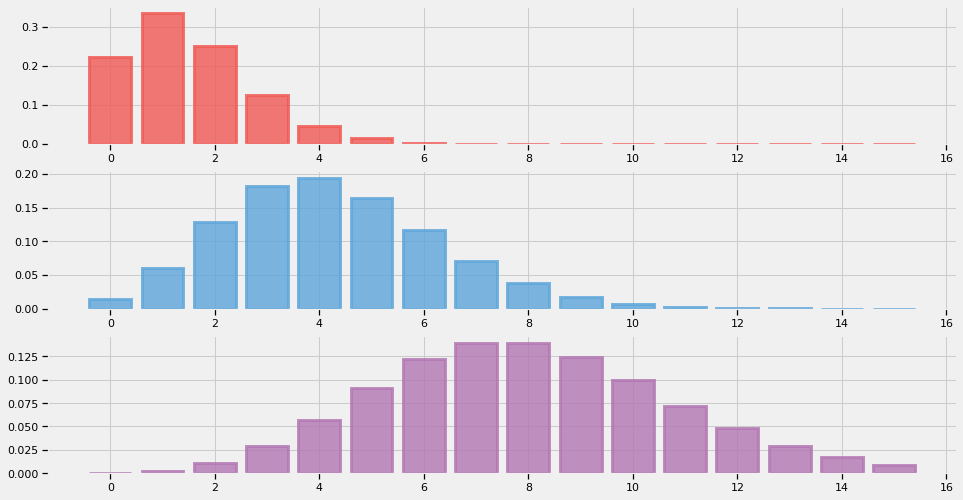

In [110]:
colours = [TFColor[0], TFColor[3], TFColor[6]]
plt.figure(figsize=(14.5, 8))
x  = np.arange(0,15,1)
print(x)
for i in range(len(lambdas)):
    plt.subplot(3,1,i+1)
    plt.bar(x=x_,height=poi_pmf_[i],alpha=.8,color=colours[i],edgecolor=colours[i], lw="3")
    
    

In [111]:
lambdas = tf.constant([.5,1])
x = tf.range(start=0,delta=0.04,limit=4)
expo_pdf = tfd.Exponential(rate=lambdas[:,tf.newaxis]).prob(x)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


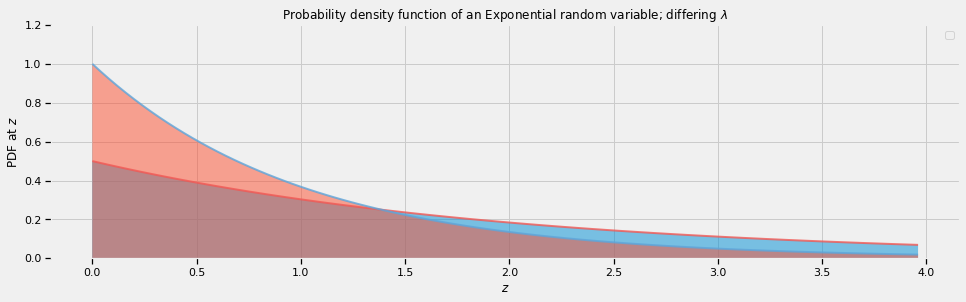

In [112]:
x_,expo_pdf_  = evaluate([x,expo_pdf])
plt.figure(figsize=(14.5, 4))
for i in range(len(lambdas)):
    
    plt.plot(x_,expo_pdf_[i],alpha=.8,color=colours[i], lw="2")
    plt.fill_between(x_,y1=0,y2=expo_pdf_[i],alpha=.5)
    plt.legend()
    plt.ylabel("PDF at $z$")
    plt.xlabel("$z$")
    plt.ylim(0,1.2)
    plt.title(r"Probability density function of an Exponential random variable; differing $\lambda$");

In [113]:
count_data = tf.constant([
    13,  24,   8,  24,   7,  35,  14,  11,  15,  11,  22,  22,  11,  57,  
    11,  19,  29,   6,  19,  12,  22,  12,  18,  72,  32,   9,   7,  13,  
    19,  23,  27,  20,   6,  17,  13,  10,  14,   6,  16,  15,   7,   2,  
    15,  15,  19,  70,  49,   7,  53,  22,  21,  31,  19,  11,  18,  20,  
    12,  35,  17,  23,  17,   4,   2,  31,  30,  13,  27,   0,  39,  37,   
    5,  14,  13,  22,
], dtype=tf.float32)

In [114]:
days = count_data.shape[0]

Text(0.5, 1.0, "Did the user's texting habits change over time?")

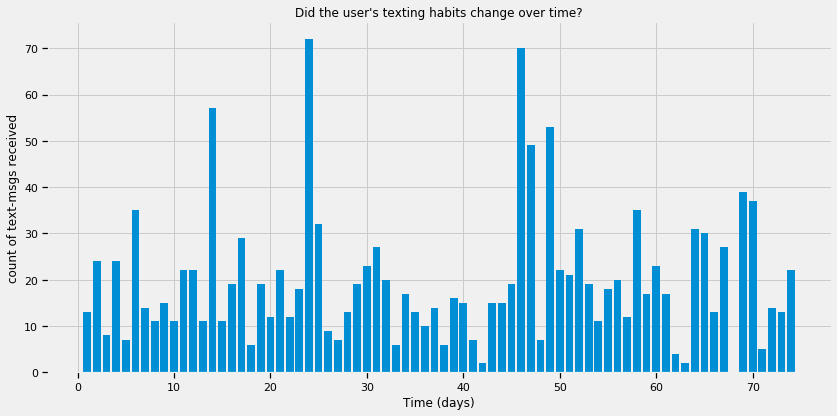

In [115]:
plt.figure(figsize=(12.5, 6))
count_data_ = evaluate([count_data]) 
x =  tf.range(start=1,delta=1,limit=days+1)
plt.bar(x=x,height=count_data)
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")

/home/quantiphi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


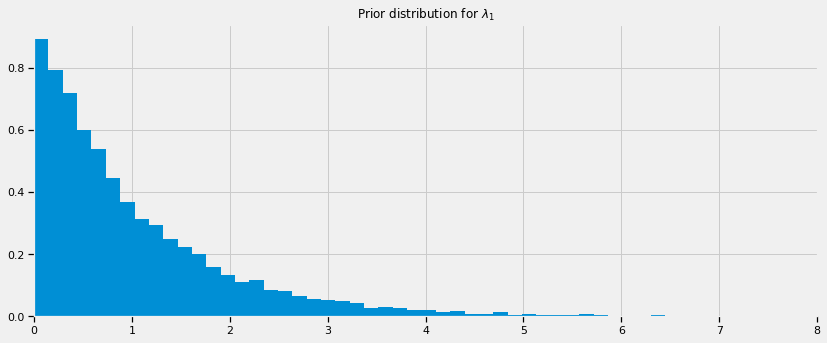

In [120]:
exponential_dist =  tfd.Exponential(rate=1.0)
lambda_samples  =  exponential_dist.sample(10000)
lambda_samples_ = evaluate([lambda_samples])

# Visualize our stepwise prior distribution
plt.figure(figsize(12.5, 5))
plt.hist(lambda_samples_, bins=70, normed=True, histtype="stepfilled")
plt.title(r"Prior distribution for $\lambda_1$")
plt.xlim(0, 8);

In [148]:
lambda1 = tfd.Exponential(rate=1.0,name="lambda1")
lambda2 = tfd.Exponential(rate=1.0,name="lambda2")
tau = tfd.Uniform(low=0.0,high  =10.0, name = "tau")

deterministic = tfd.Deterministic(loc=lambda1.sample()+lambda2.sample(),name="deterministic v")


tf.Tensor(2.6284633, shape=(), dtype=float32)


In [157]:
n_samples  = 10
idx = np.arange(n_samples)
tf.gather([lambda1.sample(),lambda2.sample()],indices= tf.to_int32(tau.sample()>idx))

<tf.Tensor: id=2401, shape=(10,), dtype=float32, numpy=
array([0.43930742, 0.43930742, 0.43930742, 0.42536464, 0.42536464,
       0.42536464, 0.42536464, 0.42536464, 0.42536464, 0.42536464],
      dtype=float32)>

In [161]:
data = tf.constant([1.0,5.0], tf.float32)

In [162]:
tf.reduce_mean(data)

<tf.Tensor: id=2457, shape=(), dtype=float32, numpy=3.0>

In [207]:

def plot_data():
    tau = tf.random_uniform(shape=[1], minval=0, maxval=80, dtype=tf.int32)

    alpha = 1.0/8
    lambdas = tfd.Gamma(concentration=1.0/alpha,rate=0.3).sample(sample_shape=[2])

    l1,l2  = evaluate(lambdas)
    #print(l1,l2,tau)

    data = tf.concat([tfd.Poisson(rate=l1).sample(sample_shape = tau),tfd.Poisson(rate=l2).sample(sample_shape = 80-tau)],axis=0)


    days_range = tf.range(80)
    tau_, days_range_,data_  =  evaluate([tau,days_range,data])
    plt.bar(days_range_, data_, color=TFColor[3])
    plt.bar(tau_-1,data_[tau-1],color="r")

/home/quantiphi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


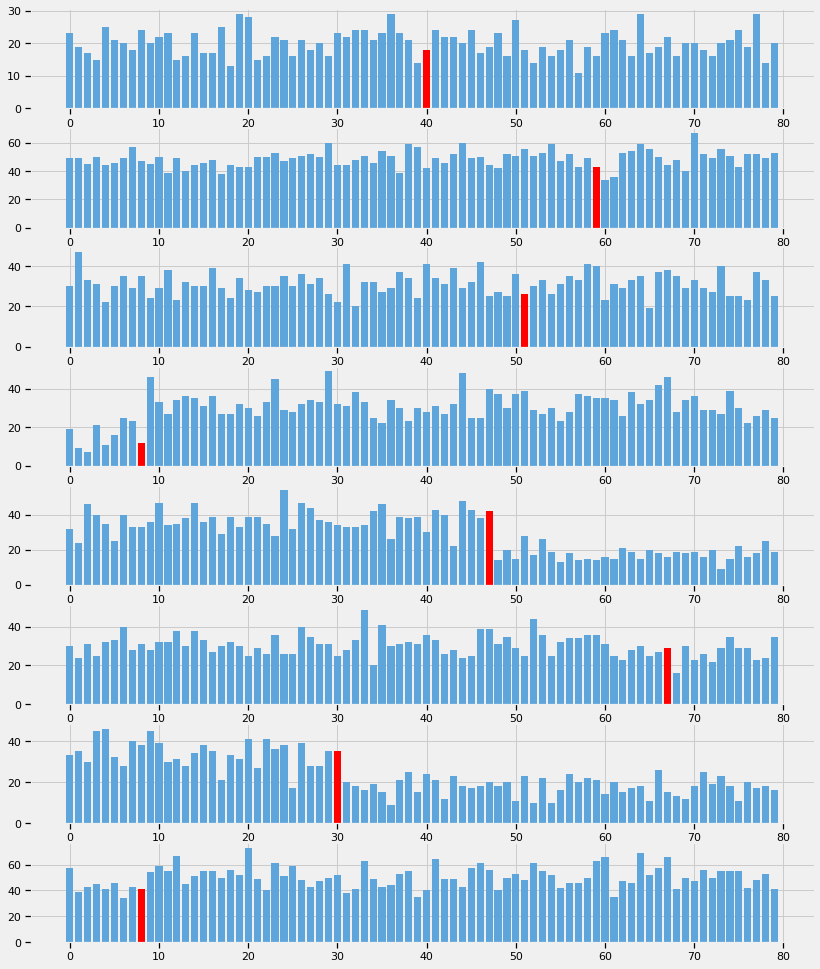

In [208]:
plt.figure(figsize(12.5, 16))
for i in range(8):
    plt.subplot(8, 1, i+1)
    plot_data()